In [2]:
# Script to generate plots for ssd mobility performance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd 
from scipy import signal
import textwrap
from scipy.signal import butter, lfilter
import math
import imutils
import os
import glob
%matplotlib inline

In [1]:
from Process import *
config_filepath = 'None' #file_list[0]
marker_filepath = r'E:\data\test_results\P2\Session_preprocessed\AVOID01.c3d'
recording_filepath = 'None' #file_list[0]
self = LowVisionSubjectAvoid(config_filepath, marker_filepath, recording_filepath)


Participants = ['P1','P2','P3','P5','P7','P9','P10']
random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
Avoid = pd.DataFrame()


for Participants_id in Participants: 

    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")

    # Sort the index to get the correct trial index
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results = results.sort_index(ascending=True)
    results = results.iloc[0:19,:]

    # Inport random sheet to get trial info 
    results = pd.concat([random, results], axis=1)
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results['Mos_mean'] = results['Margin_stability_all'].apply(lambda x: np.mean(x))
    results['Mos_all'] = results['Margin_stability_all'].apply(lambda x: sum(x))
    results['Mos_peak'] = results['Margin_stability_all'].apply(lambda x: max(x))
    results['vel_data'] = results['COFM_absvel'].apply(lambda x: self.velocity(np.array([item for sublist in x for item in sublist]).reshape(-1, 3)))
    results['hesitation_segments'] = results['vel_data'].apply(lambda x: sum(len(sublist) for sublist in self.hesitations(x[0])[1]))
    results['Deviating_mean'] = results['Deviating_distance'].apply(lambda x: np.mean(x))
    results['Clearing_mean'] = results['Clearing_distance'].apply(lambda x: np.mean(x))
    
    Avoid = pd.concat([Avoid,results])

[I 2023-11-30 15:44:01,588 WebStreaming] Starting Streaming Server...
[E 2023-11-30 15:44:01,758 OutputInterface] Serial port 'COM13' not available.


In [3]:
Avoid

,trial_num,device_type,mode,location,location_num,Passing_time,Average_velocity,Max_velocity,Hesitation_number,Travel_distance,...,rmt23,rmt1,Average_cane_angle,Mos_mean,Mos_all,Mos_peak,vel_data,hesitation_segments,Deviating_mean,Clearing_mean
1,AVOID 1,MiniGuide,Depth,C,3,17.091667,0.374900,0.795097,3,6.447869,...,"[[-2682.9055175781, 1053.0451660156, 42.515045...","[[-2671.0776367188, 1092.7185058594, 48.209320...",10.266571,173.148547,355127.670862,448.050130,"([1.4765481436504425e-05, 0.00231382972790144,...",503,1.144402,1.281622
2,AVOID 2,Cane,None,A,1,9.808333,0.616412,1.038477,0,6.093465,...,"[[-2647.7739257812, 1013.8625488281, 43.800540...","[[-2633.5981445312, 1052.9029541016, 49.293777...",14.395273,208.481482,245382.704064,482.873286,"([0.00010479275414178592, 0.033677232791150695...",0,1.002394,0.641488
3,AVOID 3,Cane,None,B,2,9.458333,0.618814,1.110227,0,5.893715,...,"[[-2650.1440429688, 1015.5767822266, 43.322265...","[[-2635.0947265625, 1054.1634521484, 49.321537...",13.813669,219.076915,248652.299078,529.010033,"([-0.0001625684950150526, 0.004979669123311171...",0,1.354191,0.848344
4,AVOID 4,MiniGuide,Depth,A,1,26.641667,0.307390,0.877522,2,8.223422,...,"[[-2671.0285644531, 1031.5302734375, 43.176280...","[[-2659.6977539062, 1071.1949462891, 48.811286...",16.272488,153.325617,490181.996430,477.927221,"([3.910279873762742e-07, 0.001789096330864148,...",433,1.347252,0.978319
5,AVOID 5,vOICe,Depth,B,2,9.950000,0.597269,1.089606,0,5.975080,...,"[[-2656.9365234375, 1034.9973144531, 42.625484...","[[-2641.8532714844, 1073.3978271484, 48.491577...",12.122693,203.155055,242567.135821,501.570657,"([0.000638411252195858, 0.0010696187907151364,...",0,0.729125,0.771857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,AVOID 14,vOICe,Depth,C,3,41.225000,0.209210,0.560146,5,8.660905,...,"[[-2626.4655761719, 983.9763793945, 42.5307617...","[[-2618.6047363281, 1027.6580810547, 45.773296...",11.796134,123.618766,611542.034536,321.091562,"([-0.0001439927570794242, 0.001275578958121169...",954,1.501315,0.983006
15,AVOID 15,Cane,None,A,1,27.225000,0.305214,0.563232,1,8.333804,...,"[[-2649.7734375, 990.8322753906, 42.9512367249...","[[-2647.83984375, 1035.2619628906, 44.98218917...",14.973768,138.608680,452834.557146,357.711098,"([-9.098887398592712e-07, 0.0055164377159672, ...",456,1.189450,0.964030
16,AVOID 16,vOICe,Depth,B,2,28.208333,0.288598,0.559866,0,8.169029,...,"[[-2675.1474609375, 1005.4755859375, 42.794612...","[[-2669.9326171875, 1049.1593017578, 45.270507...",9.627432,129.266291,437566.394288,323.623607,"([0.0002708727314280696, 0.009504599237355197,...",0,0.878494,1.027303
17,AVOID 17,Cane,None,C,3,26.258333,0.329374,0.647770,0,8.675673,...,"[[-2703.8779296875, 1036.4537353516, 42.127304...","[[-2707.3776855469, 1079.8308105469, 44.597106...",16.260589,137.786703,434165.901576,326.318816,"([-0.0008390795509377991, 0.005635107443868602...",0,0.000000,0.000000


In [4]:
cane = Avoid[(Avoid.device_type == 'Cane')]
mini = Avoid[(Avoid.device_type == 'MiniGuide')]
voice = Avoid[(Avoid.device_type == 'vOICe')]

In [5]:
barWidth = 0.15
locate_xtick = ['Cane','MiniGuide','vOICe-Depth','vOICe-Intensity']
avoid_xtick = ['Cane','MiniGuide','vOICe-Depth']
br1 = np.arange(len(locate_xtick))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br_list = [br1, br2, br3, br4, br5]
c_list = ['blue','red','green','yellow','black']
x_tick_loc_locate = np.sum(br_list,axis=0)/len(Participants)
x_tick_loc_avoid = np.sum([item[0:3] for item in br_list],axis=0)/len(Participants)

Text(0, 0.5, 'Meter')

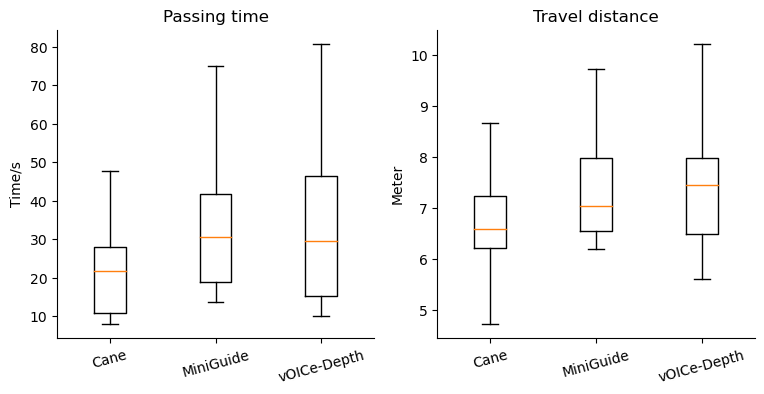

In [7]:
# Response time near and far 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane.Passing_time[cane.Passing_time != 0],
    mini.Passing_time[mini.Passing_time != 0],
    voice.Passing_time[voice.Passing_time != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near'], showfliers=False);

axs[0].set_xticks([1,2,3], avoid_xtick, rotation = 15)

axs[1].boxplot([
    cane.Travel_distance[cane.Travel_distance != 0],
    mini.Travel_distance[mini.Travel_distance != 0],
    voice.Travel_distance[voice.Travel_distance != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near'], showfliers=False);

axs[1].set_xticks([1,2,3],avoid_xtick, rotation = 15);

# axs[0].set_ylim([0,50])
# axs[1].set_ylim([0,50])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Passing time')
axs[1].set_title('Travel distance')
axs[0].set_ylabel('Time/s')
axs[1].set_ylabel('Meter')

Text(0.5, 1.0, 'Margin of stability')

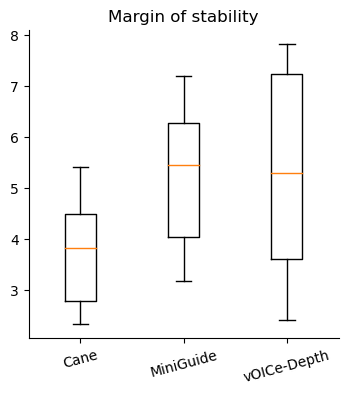

In [11]:
# Cane and mos

# Create a figure and axis
fig, axs = plt.subplots(1,1,figsize=(4,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

# axs[0].boxplot([
#     cane.Average_cane_angle[cane.Average_cane_angle != 0],
#     mini.Average_cane_angle[mini.Average_cane_angle != 0],
#     voice.Average_cane_angle[voice.Average_cane_angle != 0]
# ],
# labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near'], showfliers=False);

# axs[0].set_xticks([1,2,3], avoid_xtick, rotation = 15)

axs.boxplot([
    cane.Mos_all[cane.Mos_all != 0]/100000,
    mini.Mos_all[mini.Mos_all != 0]/100000,
    voice.Mos_all[voice.Mos_all != 0]/100000
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near'], showfliers=False);

axs.set_xticks([1,2,3],avoid_xtick, rotation = 15);

# axs[0].set_ylim([0,50])
# axs[1].set_ylim([0,50])

# axs[0].spines['top'].set_visible(False)
# axs[0].spines['right'].set_visible(False)

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

# axs.set_title('Cane angle')
axs.set_title('Margin of stability')
# axs.set_ylabel('Time/s')

Text(0, 0.5, 'Time/s')

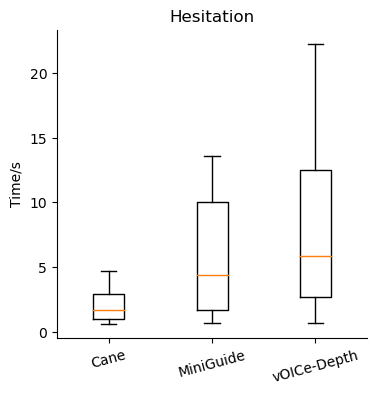

In [14]:
# Hesitation 

# Create a figure and axis
fig, axs = plt.subplots(1,1,figsize=(4,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

# axs[0].boxplot([
#     cane.Hesitation_number[cane.Hesitation_number != 0],
#     mini.Hesitation_number[mini.Hesitation_number != 0],
#     voice.Hesitation_number[voice.Hesitation_number != 0]
# ],
# labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near'], showfliers=False);

# axs[0].set_xticks([1,2,3], avoid_xtick, rotation = 15)

axs.boxplot([
    cane.hesitation_segments[cane.hesitation_segments != 0]/160,
    mini.hesitation_segments[mini.hesitation_segments != 0]/160,
    voice.hesitation_segments[voice.hesitation_segments != 0]/160
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near'], showfliers=False);

axs.set_xticks([1,2,3],avoid_xtick, rotation = 15);

# axs[0].set_ylim([0,50])
# axs[1].set_ylim([0,50])

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

# axs[1].spines['top'].set_visible(False)
# axs[1].spines['right'].set_visible(False)

# axs[0].set_title('Hesitation number')
axs.set_title('Hesitation')
axs.set_ylabel('Time/s')

Text(0, 0.5, 'Meter')

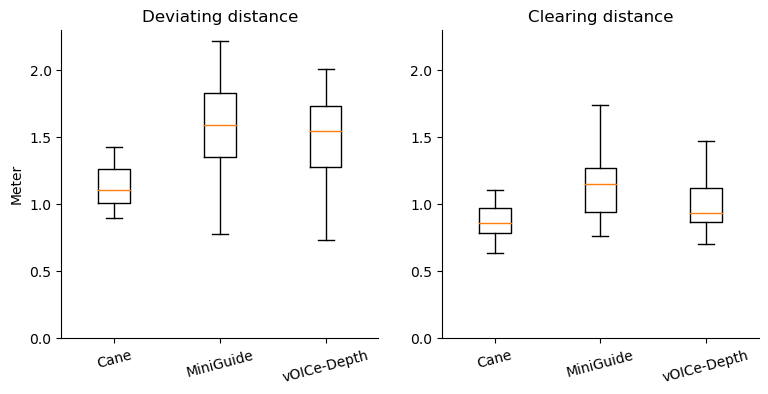

In [16]:
# Deviation and clearing 

# Create a figure and axis
fig, axs = plt.subplots(1,2,figsize=(9,4));

# axs[0].boxplot([cane_near.Response_time[cane_near.Response_time != 0], mini_near.Response_time[mini_near.Response_time!=0],voiceinten_near.Response_time[voiceinten_near.Response_time!=0],voicedepth_near.Response_time[voicedepth_near.Response_time!0]],labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near', 'vOICe Depth Near'],  showfliers=False);

axs[0].boxplot([
    cane.Deviating_mean[cane.Deviating_mean != 0],
    mini.Deviating_mean[mini.Deviating_mean != 0],
    voice.Deviating_mean[voice.Deviating_mean != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near'], showfliers=False);

axs[0].set_xticks([1,2,3], avoid_xtick, rotation = 15)

axs[1].boxplot([
    cane.Clearing_mean[cane.Clearing_mean != 0],
    mini.Clearing_mean[mini.Clearing_mean != 0],
    voice.Clearing_mean[voice.Clearing_mean != 0]
],
labels=['Cane Near', 'MiniGuide Near', 'vOICe Intensity Near'], showfliers=False);

axs[1].set_xticks([1,2,3],avoid_xtick, rotation = 15);

axs[0].set_ylim([0,2.3])
axs[1].set_ylim([0,2.3])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[0].set_title('Deviating distance')
axs[1].set_title('Clearing distance')
axs[0].set_ylabel('Meter')